In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
temperature = ctrl.Antecedent(np.arange(15, 35, 0.1),'temperature')
humidity = ctrl.Antecedent(np.arange(0, 100, 1),'humidity')

water  = ctrl.Consequent(np.arange(0, 25, 0.5),'water')

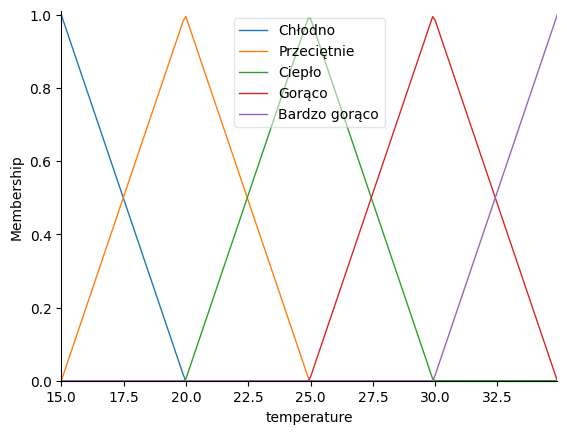

In [ ]:
names = ['Chłodno', 'Przeciętnie', 'Ciepło', 'Gorąco', 'Bardzo gorąco']

temperature.automf(names=names)
temperature.view()

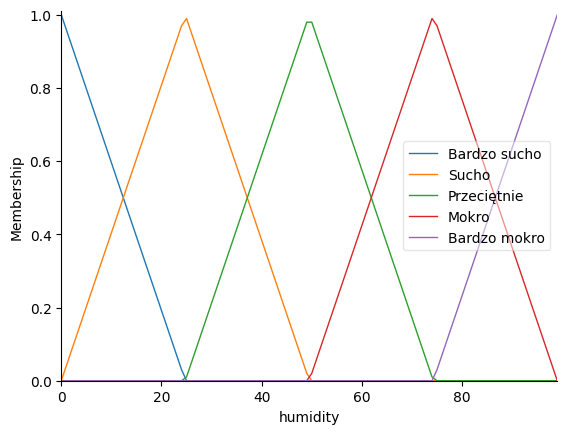

In [ ]:
names = ['Bardzo sucho', 'Sucho', 'Przeciętnie', 'Mokro', 'Bardzo mokro']

humidity.automf(names=names)
humidity.view()

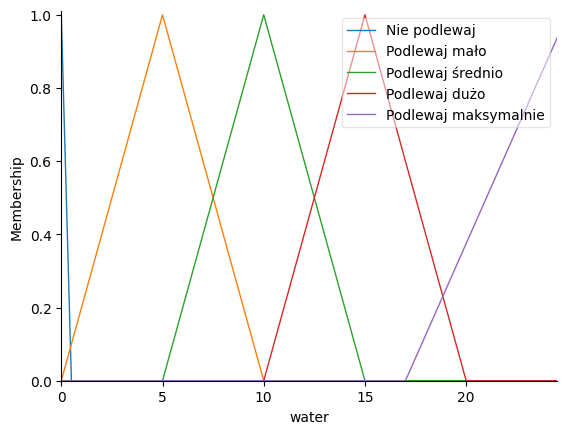

In [ ]:
water['Nie podlewaj'] = fuzz.trimf(water.universe, [0, 0, 0])
water['Podlewaj mało'] = fuzz.trimf(water.universe, [0, 5, 10])
water['Podlewaj średnio'] = fuzz.trimf(water.universe, [5, 10, 15])
water['Podlewaj dużo'] = fuzz.trimf(water.universe, [10, 15, 20])
water['Podlewaj maksymalnie'] = fuzz.trimf(water.universe, [17, 25, 25])

water.view()

In [ ]:
rule1 = ctrl.Rule(humidity['Bardzo sucho'] & temperature['Gorąco'] 
                  | humidity['Bardzo sucho'] & temperature['Bardzo gorąco'] 
                  | humidity['Sucho'] & temperature['Bardzo gorąco']
                  , water['Podlewaj maksymalnie']) 

rule2 = ctrl.Rule(humidity['Bardzo sucho'] & temperature['Chłodno'] 
                  | humidity['Bardzo sucho'] & temperature['Przeciętnie'] 
                  | humidity['Bardzo sucho'] & temperature['Ciepło']
                  | humidity['Sucho'] & temperature['Ciepło']
                  | humidity['Sucho'] & temperature['Gorąco']
                  | humidity['Przeciętnie'] & temperature['Gorąco']
                  | humidity['Przeciętnie'] & temperature['Bardzo gorąco']
                  , water['Podlewaj dużo']) 

rule3 = ctrl.Rule(humidity['Sucho'] & temperature['Chłodno'] 
                  | humidity['Sucho'] & temperature['Przeciętnie'] 
                  | humidity['Przeciętnie'] & temperature['Przeciętnie']
                  | humidity['Przeciętnie'] & temperature['Ciepło']
                  | humidity['Mokro'] & temperature['Bardzo gorąco']
                  , water['Podlewaj średnio']) 

rule4 = ctrl.Rule(humidity['Przeciętnie'] & temperature['Chłodno'] 
                  | humidity['Mokro'] & temperature['Przeciętnie'] 
                  | humidity['Mokro'] & temperature['Ciepło']
                  | humidity['Mokro'] & temperature['Gorąco']
                  | humidity['Przeciętnie'] & temperature['Ciepło']
                  | humidity['Bardzo mokro'] & temperature['Gorąco']
                  | humidity['Bardzo mokro'] & temperature['Bardzo gorąco']
                  , water['Podlewaj mało']) 

rule5 = ctrl.Rule(humidity['Mokro'] & temperature['Chłodno'] 
                  | humidity['Bardzo mokro'] & temperature['Chłodno']
                  | humidity['Bardzo mokro'] & temperature['Przeciętnie']
                  | humidity['Bardzo mokro'] & temperature['Ciepło']
                  , water['Nie podlewaj']) 


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

model = ctrl.ControlSystemSimulation(control_system)

Model proponuje water:  7.44719347672527


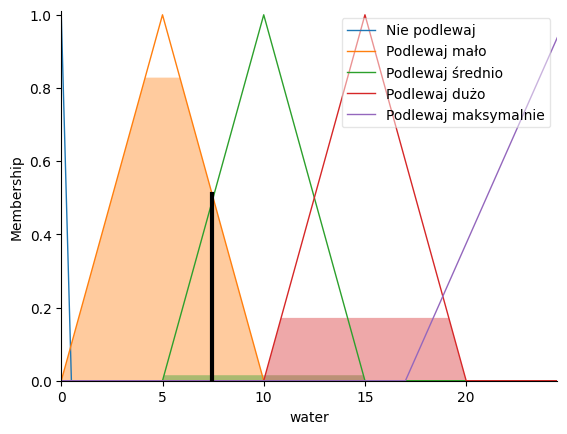

In [ ]:
model.input['humidity'] = 70
model.input['temperature'] = 30

model.compute()

print('Model proponuje water: ', model.output['water'])
water.view(sim=model)

<Axes: xlabel='temperature', ylabel='humidity'>

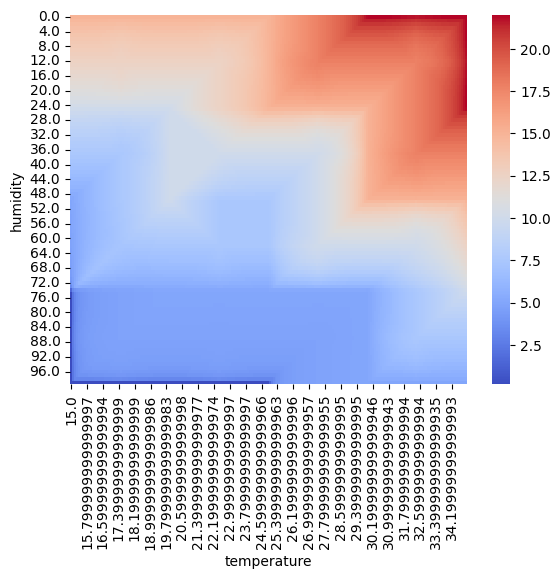

In [ ]:
import seaborn as sns
import pandas as pd

temperature_grid, humidity_grid = np.meshgrid(np.arange(15, 35, 0.1), np.arange(0, 100, 1))
test_points = np.transpose(np.vstack((np.ravel(temperature_grid),np.ravel(humidity_grid))))

model.input['temperature'] = test_points[:,0]
model.input['humidity'] = test_points[:,1]
model.compute()

test_points = np.concatenate((test_points, model.output['water'].reshape(-1,1)), axis=1)

sns.heatmap(pd.DataFrame(test_points, columns = ['temperature','humidity','water']).pivot(index='humidity', columns='temperature', values='water'), cmap = 'coolwarm')

In [ ]:
# --------------------------------------------------------------------------------

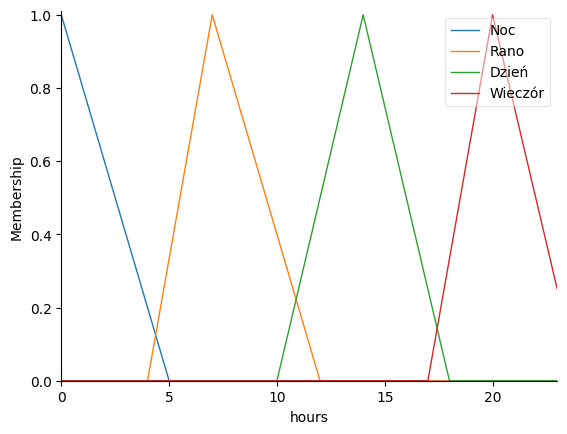

In [ ]:
hours = ctrl.Antecedent(np.arange(0, 24, 1),'hours')

hours['Noc'] = fuzz.trimf(hours.universe, [0, 0, 5])
hours['Rano'] = fuzz.trimf(hours.universe, [4, 7, 12])
hours['Dzień'] = fuzz.trimf(hours.universe, [10, 14, 18])
hours['Wieczór'] = fuzz.trimf(hours.universe, [17, 20, 24])


hours.view()

In [ ]:
rule6 = ctrl.Rule(hours['Noc'], water['Nie podlewaj']) 
rule7 = ctrl.Rule(hours['Rano'], water['Podlewaj średnio']) 
rule8 = ctrl.Rule(hours['Dzień'], water['Podlewaj dużo']) 
rule9 = ctrl.Rule(hours['Wieczór'], water['Podlewaj mało']) 


control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, 
                                     rule5, rule6, rule7, rule8, rule9])

model = ctrl.ControlSystemSimulation(control_system)

Model proponuje water:  10.074762872178663


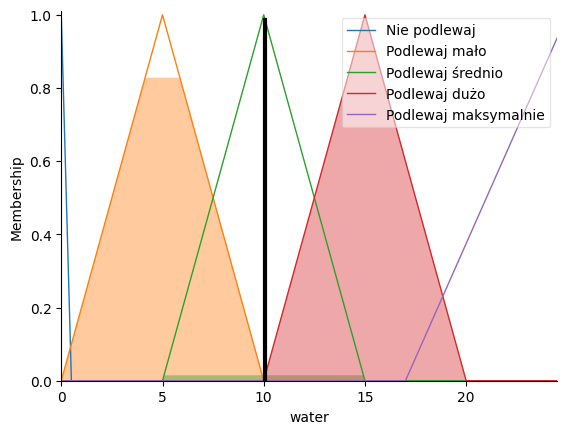

In [ ]:
model.input['humidity'] = 70
model.input['temperature'] = 30
model.input['hours'] = 14

model.compute()

print('Model proponuje water: ', model.output['water'])
water.view(sim=model)

<Axes: xlabel='temperature', ylabel='humidity'>

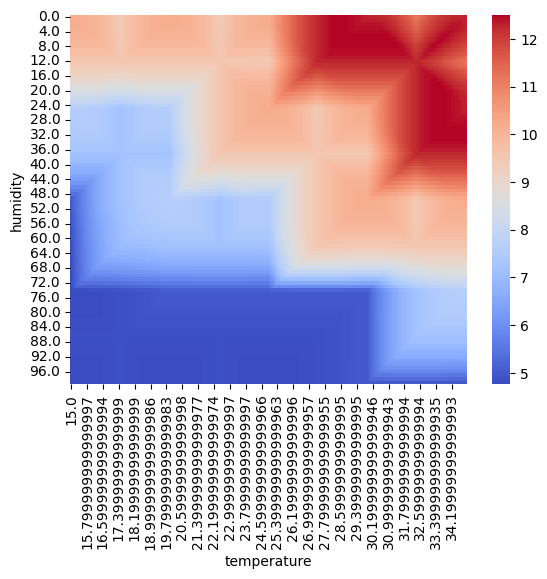

In [ ]:
temperature_grid, humidity_grid = np.meshgrid(np.arange(15, 35, 0.1), np.arange(0, 100, 1))
test_points = np.transpose(np.vstack((np.ravel(temperature_grid),np.ravel(humidity_grid))))

model.input['temperature'] = test_points[:,0]
model.input['humidity'] = test_points[:,1]
model.input['hours'] = np.array([21] * 20000)
model.compute()

test_points = np.concatenate((test_points, model.output['water'].reshape(-1,1)), axis=1)

sns.heatmap(pd.DataFrame(test_points, columns = ['temperature','humidity','water']).pivot(index='humidity', columns='temperature', values='water'), cmap = 'coolwarm')